In [200]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join as os_join

In [201]:
root = "/Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/"

In [202]:
def plot(data, img_name, x_label='epoch', y_label=""):

    plt.figure(figsize=(10,8))
    ax = sns.lineplot(data=data)
    ax.set(xlabel=x_label, ylabel=y_label)

    plt.setp(ax.get_legend().get_texts(), fontsize='15')
    plt.savefig(os_join(root, img_name),  bbox_inches='tight')

    print(f"saved {os_join(root, img_name)}!")
    plt.show()

def read_result_from_mllog(root, log_folder):
    train_loss = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/train_loss"),
                             header=None, sep=" ").iloc[:,1]

    val_loss = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_loss"),
                             header=None, sep=" ").iloc[:,1]

    val_acc = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_acc"),
                             header=None, sep=" ").iloc[:,1]

    val_f1 = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_f1"),
                             header=None, sep=" ").iloc[:,1]


    df = pd.concat([train_loss, val_loss, val_acc, val_f1], axis=1)
    df.columns = ["train_loss", "val_loss", "val_acc", "val_f1"]

    return df




# Cora

In [203]:
df_official = pd.read_csv(os_join(root, "logs", "Cora_GAT_official_results.csv"))
df_our = pd.read_csv(os_join(root, "logs", "Cora_GAT_our_results_2.csv"))

In [204]:
df_official.head()
df_official["train_acc"]  = df_official["train_acc"] * 100
df_official["val_acc"]  = df_official["val_acc"] * 100

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/cora_loss.png!


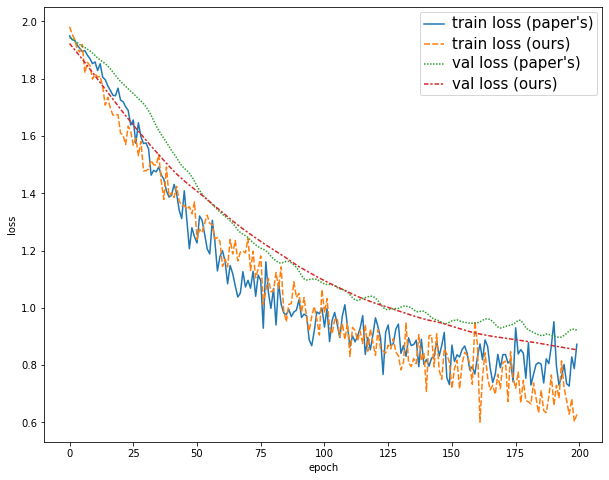

In [205]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss_list"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss_list"][:num_obs],})

plot(df_loss, "plots/cora_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/cora_acc.png!


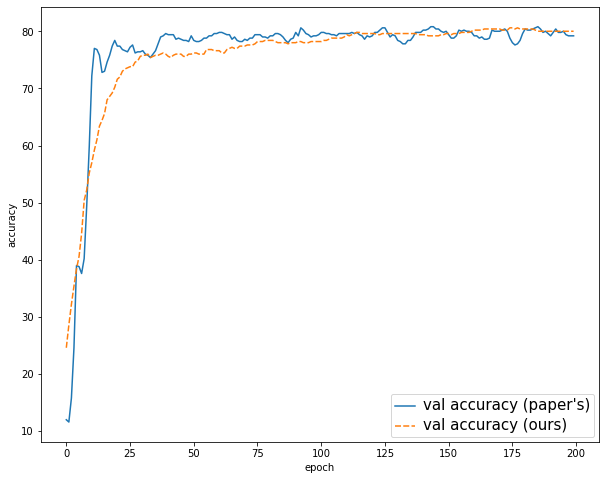

In [206]:
num_obs = len(df_official)
df_acc = pd.DataFrame({"val accuracy (paper's)": df_official["val_acc"],
                        "val accuracy (ours)": df_our["val_acc_list"][:num_obs]})
plot(df_acc, "plots/cora_acc.png", x_label='epoch', y_label="accuracy")

# gossipcop

In [207]:
df_official = pd.read_csv(os_join(root, "logs/gossipcop_bert_official_results.csv"))
df_our = read_result_from_mllog(root, "05638707dc0140aa96d5962c27a8059a")

df_official["val_acc"] *= 100
df_official["test_acc"] *= 100
df_official.head()

,Epoch,train_acc,train_loss,val_acc,test_acc,test_loss,val_loss
0,1,0.5101,0.6922,48.53,49.92,0.6829,0.6763
1,2,0.5403,0.6859,52.20,52.98,0.6900,0.6617
2,3,0.5101,0.6832,48.53,49.92,0.6674,0.6349
3,4,0.5101,0.6688,48.53,49.92,0.5918,0.5941
4,5,0.7967,0.5940,83.15,79.74,0.5645,0.4590


saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/gossipcop_loss.png!


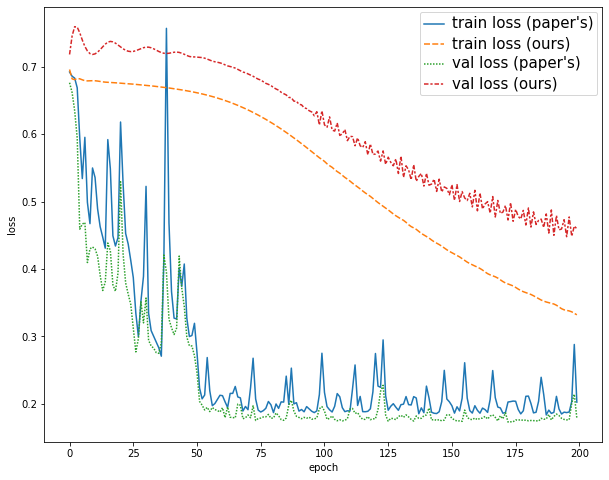

In [208]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss"][:num_obs],})

plot(df_loss, "plots/gossipcop_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/gossipcop_acc.png!


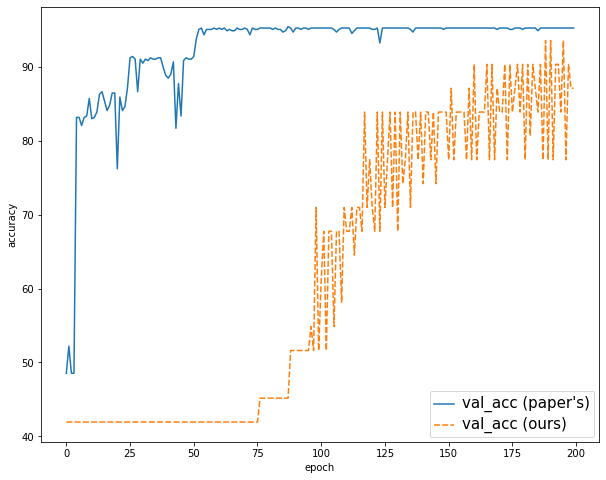

In [209]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"val_acc (paper's)": df_official["val_acc"],
                        "val_acc (ours)": df_our["val_acc"][:num_obs],
                        # "val f1 (paper's)": df_official["val_f1"],
                        # "val f1 (ours)": df_our["val_f1"][:num_obs],
                        })

plot(df_loss, "plots/gossipcop_acc.png", x_label='epoch', y_label="accuracy")

# politifact

In [210]:
df_official = pd.read_csv(os_join(root, "logs/politifact_spacy_official_results.csv"))
df_our = read_result_from_mllog(root, "05638707dc0140aa96d5962c27a8059a")

df_official["val_acc"] *= 100
df_official["test_acc"] *= 100
df_official.head()

,Epoch,train_acc,train_loss,val_acc,test_acc,test_loss,val_loss
0,1,0.5806,0.6866,41.94,48.87,0.7029,0.7119
1,2,0.5806,0.6782,41.94,48.87,0.7072,0.7241
2,3,0.5806,0.6761,41.94,48.87,0.7073,0.7274
3,4,0.5806,0.6748,41.94,48.87,0.7057,0.7256
4,5,0.5806,0.6740,41.94,48.87,0.7038,0.7229


saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/politifact_loss.png!


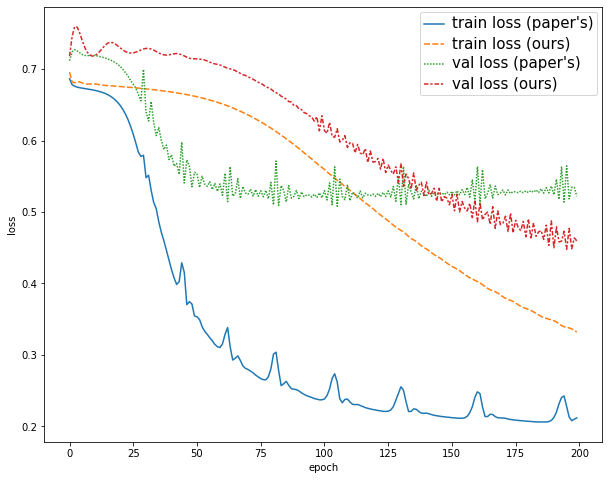

In [211]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss"][:num_obs],})

plot(df_loss, "plots/politifact_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/politifact_acc.png!


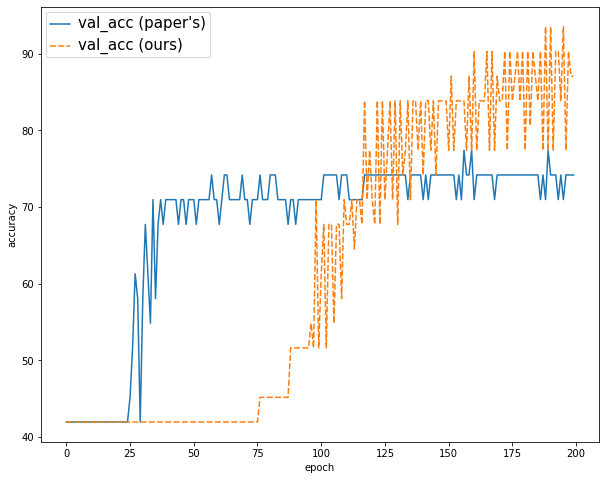

In [212]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"val_acc (paper's)": df_official["val_acc"],
                        "val_acc (ours)": df_our["val_acc"][:num_obs],
                        # "val f1 (paper's)": df_official["val_f1"],
                        # "val f1 (ours)": df_our["val_f1"][:num_obs],
                        })

plot(df_loss, "plots/politifact_acc.png", x_label='epoch', y_label="accuracy")